# 实验二：回归模型
- 姓名：胡博浩
- 学号：2212998
- 专业：信息安全

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月22日
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

**环境**：conda python 3.9.18 + vscode

代码都进行了适当注释和分析，感谢助教的批阅！辛苦！

---

## 导入需要的包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 导入数据集

In [3]:
data = pd.read_csv("winequality-white.csv")
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

根据结果，我们可以对数据集进行初步分析：
* **葡萄酒质量评分 (quality)**: 这是数据集的目标变量，代表葡萄酒的质量水平。评分范围从 0 到 10，可以用于评估葡萄酒的口感、香气、色泽等综合品质。
* **化学成分**: 数据集包含了 11 个化学成分特征，例如：
    * **fixed acidity**: 固定酸度，影响葡萄酒的酸味和口感。
    * **volatile acidity**: 挥发性酸度，影响葡萄酒的香气和稳定性。
    * **citric acid**: 柠檬酸，影响葡萄酒的酸味和口感。
    * **residual sugar**: 残糖，影响葡萄酒的甜度和口感。
    * **chlorides**: 氯化物，影响葡萄酒的口感和风味。
    * **free sulfur dioxide**: 游离二氧化硫，用于防腐和抗氧化。
    * **total sulfur dioxide**: 总二氧化硫，包括游离和结合二氧化硫。
    * **density**: 密度，可以反映葡萄酒的酒精含量和甜度。
    * **pH**: 酸碱度，影响葡萄酒的酸味和口感。
    * **sulphates**: 硫酸盐，影响葡萄酒的口感和风味。
    * **alcohol**: 酒精含量，影响葡萄酒的口感和香气。
* **缺失值**: 数据集中存在一些缺失值，例如 "fixed acidity"、"volatile acidity"、"citric acid"、"residual sugar" 等特征。这可能会影响模型的训练和预测结果。

## 对数据集进行预处理

检查并处理缺失值

In [4]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


对特征进行中心化，消除特征间的尺度差异

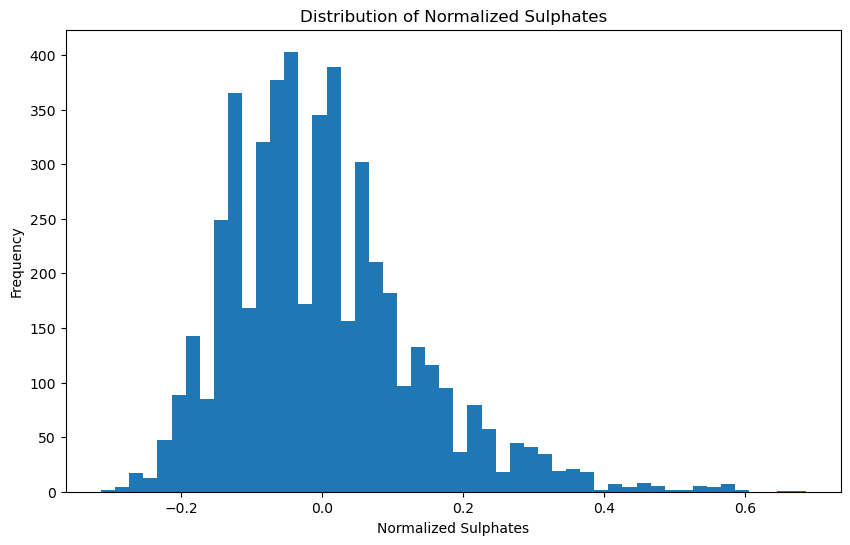

In [5]:
# 中心化函数
def normalize(x):
    return (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# 对特征进行中心化
X = normalize(X)

# 可视化归一化后的sulphates特征
plt.figure(figsize=(10, 6))
plt.hist(X["sulphates"], bins=50)
plt.title("Distribution of Normalized Sulphates")
plt.xlabel("Normalized Sulphates")
plt.ylabel("Frequency")
plt.show()

图中可以看出，中心化后的特征值分布更加均匀，且集中在 0 附近，符合中心化的预期效果。

添加偏置项，便于矩阵运算

In [6]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
X = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['bias']), X], axis=1)
X

bias  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      1.0       0.013963         -0.008080     0.015547        0.219457   
1      1.0      -0.053345          0.021332     0.003499       -0.073488   
2      1.0       0.119732          0.001724     0.039644        0.007800   
3      1.0       0.033193         -0.047295    -0.008549        0.032340   
4      1.0       0.033193         -0.047295    -0.008549        0.032340   
...    ...            ...               ...          ...             ...   
4893   1.0      -0.062960         -0.066903    -0.026621       -0.073488   
4894   1.0      -0.024499          0.040940     0.015547        0.024672   
4895   1.0      -0.034114         -0.037491    -0.086862       -0.079623   
4896   1.0      -0.130268          0.011528    -0.020597       -0.081157   
4897   1.0      -0.082191         -0.066903     0.027595       -0.085758   

      chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0     -0.002292             0.033770              0.073409  0.134425   
1      0.009578            -0.074244             -0.014758 -0.000528   
2      0.012545            -0.018495             -0.095964  0.020679   
3      0.036284             0.040738              0.110532  0.030319   
4      0.036284             0.040738              0.110532  0.030319   
...         ...                  ...                   ...       ...   
4893  -0.020096            -0.039401             -0.107565 -0.055666   
4894   0.003643             0.075582              0.068769  0.016823   
4895  -0.014161            -0.018495             -0.063482 -0.028675   
4896  -0.070541            -0.053338             -0.065802 -0.102899   
4897  -0.076476            -0.046370             -0.093644 -0.089018   

            pH  sulphates   alcohol  
0    -0.171151  -0.046334 -0.276495  
1     0.101576   0.000178 -0.163591  
2     0.065212  -0.057961 -0.066817  
3     0.001576  -0.104473 -0.099075  
4     0.001576  -0.104473 -0.099075  
...        ...        ...       ...  
4893  0.074303   0.011806  0.110602  
4894 -0.034788  -0.034706 -0.147462  
4895 -0.180242  -0.034706 -0.179720  
4896  0.137939  -0.127729  0.368667  
4897  0.065212  -0.197496  0.207376  

[4898 rows x 12 columns]

## 基本要求

 ### 数据集划分

 我们将数据集按4:1比例划分为训练集和测试集，并采用分层抽样，确保训练集和测试集中目标值（葡萄酒质量）的分布保持一致。

 注意点：
 - 使用分层抽样保持数据分布一致性，这里使用了 stratify 参数，并将其设置为 data['quality']，以确保划分后的训练集和测试集在目标变量 quality 上的分布与原始数据集一致。
 - 将特征矩阵和目标变量转换为NumPy数组，便于后续计算

In [7]:
# 使用分层抽样划分数据集，保持数据分布的一致性
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=data['quality'], random_state=42)

# 转换为NumPy数组
X_train, Y_train = np.array(X_train), np.array(Y_train).reshape(-1, 1)
X_test, Y_test = np.array(X_test), np.array(Y_test).reshape(-1, 1)

print(f"Training set shape: {X_train.shape}, {Y_train.shape}")
print(f"Test set shape: {X_test.shape}, {Y_test.shape}")

Training set shape: (3918, 12), (3918, 1)
Test set shape: (980, 12), (980, 1)


训练集包含 3918 个样本，测试集包含 980 个样本，符合 4:1 的划分比例。

### 回归系数初始化与MSE函数定义

In [8]:
# 初始化回归系数
W_init = np.random.randn(X_train.shape[1], 1)
W_init

array([[ 0.43385089],
       [ 0.14475764],
       [ 0.96289359],
       [-0.00854982],
       [ 1.00276857],
       [ 1.11092633],
       [-0.17740734],
       [ 0.06477344],
       [-0.34837756],
       [ 0.74365132],
       [-0.4452323 ],
       [-1.88836917]])

In [9]:
# 定义均方误差（MSE）函数
def MSE(X, Y, W):
    return np.mean((X.dot(W) - Y) ** 2) / 2

### 批量梯度下降与随机梯度下降

实现批量梯度下降(BGD)和随机梯度下降(SGD)算法

注意：加入早停机制，提高训练效率

In [10]:
# 实现批量梯度下降(BGD)
def BGD(X, Y, X_test, Y_test, learning_rate, epochs, W_init=None, early_stop_threshold=1e-6):
    # 初始化权重，如果没有提供初始权重则随机生成
    if W_init is None:
        W = np.random.randn(X.shape[1], 1)
    else:
        W = W_init.copy()

    m = X.shape[0] # 样本数量
    train_losses, test_losses = [], []  # 初始化训练损失和测试损失列表
    
    for i in range(epochs):
        # 计算梯度
        gradient = X.T.dot(X.dot(W) - Y) / m
        # 更新权重
        W -= learning_rate * gradient
        # 计算训练损失和测试损失
        train_loss = MSE(X, Y, W)
        test_loss = MSE(X_test, Y_test, W)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # 早停机制
        if i > 0 and abs(train_losses[-1] - train_losses[-2]) < early_stop_threshold:
            print(f"Early stopping at epoch {i}")
            break
    
    return W, train_losses, test_losses

# 实现随机梯度下降(SGD)
def SGD(X, Y, X_test, Y_test, learning_rate, epochs, W_init=None, early_stop_threshold=1e-6):
    # 初始化权重，如果没有提供初始权重则随机生成
    if W_init is None:
        W = np.random.randn(X.shape[1], 1)
    else:
        W = W_init.copy()
    m = X.shape[0]  # 样本数量
    train_losses, test_losses = [], []  # 初始化训练损失和测试损失列表
    
    for i in range(epochs):
        for j in range(m):
            # 随机选择一个样本
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = Y[random_index:random_index+1]
            # 计算梯度
            gradient = xi.T.dot(xi.dot(W) - yi)
            # 更新权重
            W -= learning_rate * gradient
        # 计算训练损失和测试损失
        train_loss = MSE(X, Y, W)
        test_loss = MSE(X_test, Y_test, W)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # 早停机制
        if i > 0 and abs(train_losses[-1] - train_losses[-2]) < early_stop_threshold:
            print(f"Early stopping at epoch {i}")
            break
    
    return W, train_losses, test_losses

### BGD和SGD在不同学习率条件下的MSE收敛曲线

通过不同的学习率运行批量梯度下降（BGD）和随机梯度下降（SGD）算法，并绘制它们的损失曲线，以比较不同学习率下模型的表现。

注意，我使用对数坐标轴绘制MSE曲线，以便更清晰地展示收敛过程

Early stopping at epoch 85


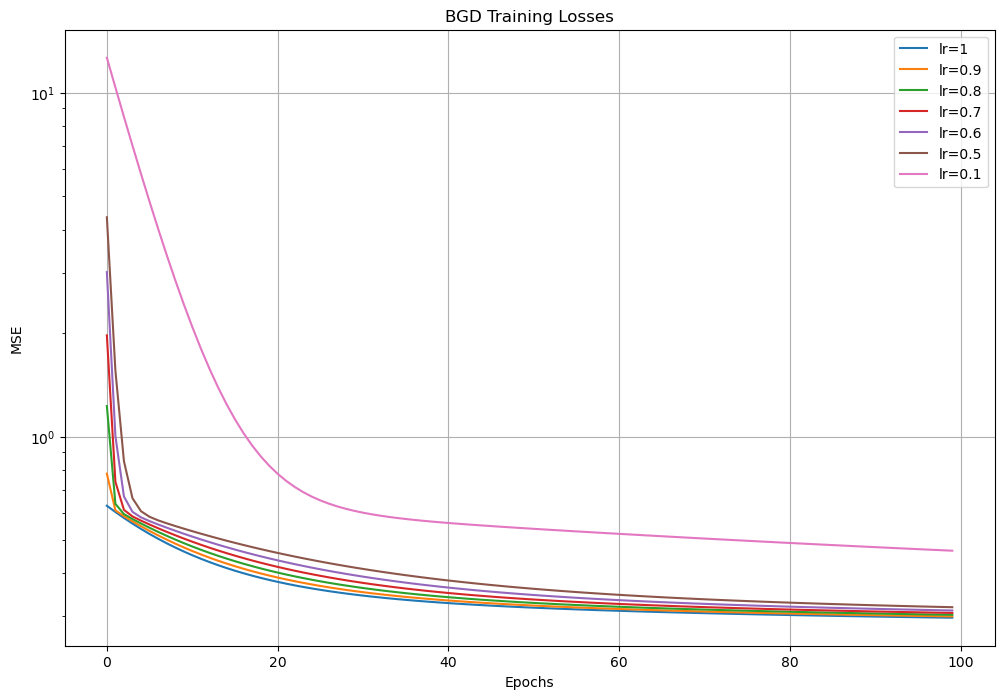

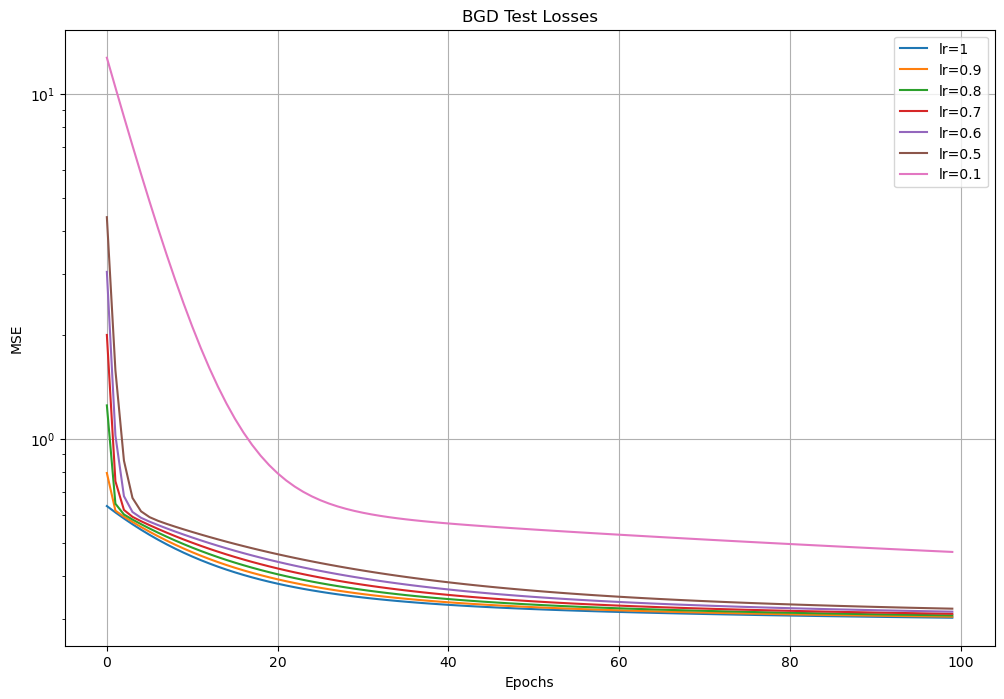

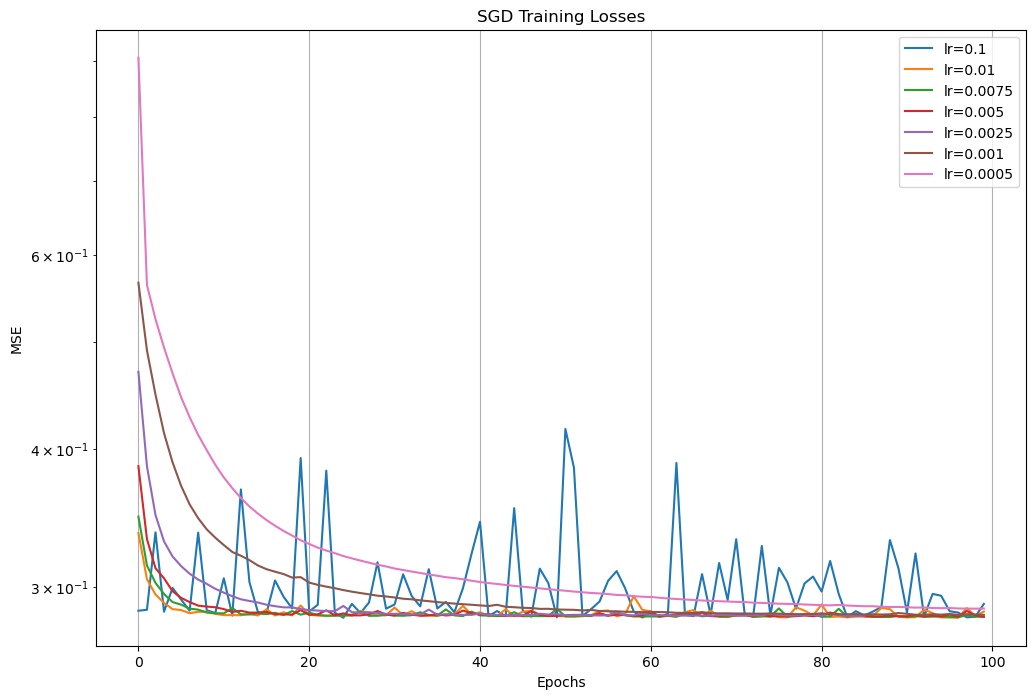

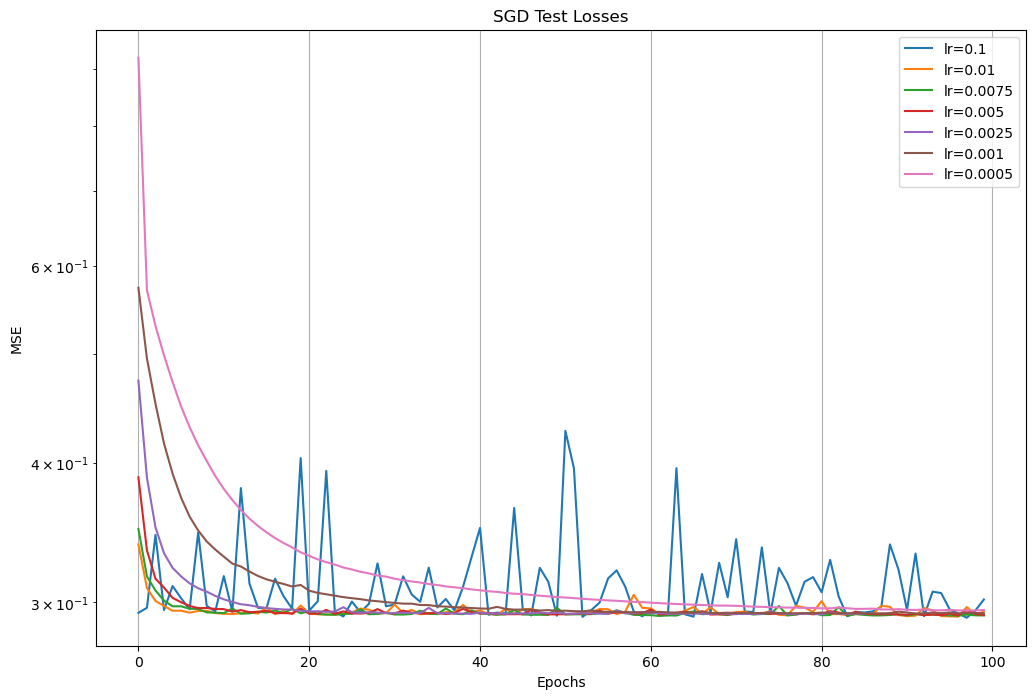

In [11]:
# 定义不同的学习率
learning_rates_bgd = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.1]
learning_rates_sgd = [0.1, 0.01, 0.0075, 0.005, 0.0025, 0.001, 0.0005]
epochs = 100

# 绘制损失曲线函数
def plot_losses(losses, title):
    plt.figure(figsize=(12, 8))
    for lr, loss in losses.items():
        plt.plot(loss, label=f'lr={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.yscale('log')  # 使用对数坐标轴
    plt.show()

# 运行BGD和SGD实验
bgd_train_losses, bgd_test_losses = {}, {}
sgd_train_losses, sgd_test_losses = {}, {}

for lr in learning_rates_bgd:
    _, bgd_train, bgd_test = BGD(X_train, Y_train, X_test, Y_test, lr, epochs, W_init)
    bgd_train_losses[lr], bgd_test_losses[lr] = bgd_train, bgd_test

for lr in learning_rates_sgd:    
    _, sgd_train, sgd_test = SGD(X_train, Y_train, X_test, Y_test, lr, epochs, W_init)
    sgd_train_losses[lr], sgd_test_losses[lr] = sgd_train, sgd_test

# 绘制MSE收敛曲线
plot_losses(bgd_train_losses, 'BGD Training Losses')
plot_losses(bgd_test_losses, 'BGD Test Losses')
plot_losses(sgd_train_losses, 'SGD Training Losses')
plot_losses(sgd_test_losses, 'SGD Test Losses')

对结果进行分析：
* **BGD 和 SGD 的 MSE 随着迭代次数的增加而逐渐减小，最终趋于稳定**。 这表明 BGD 和 SGD 都能够有效地优化模型参数，使模型性能逐渐提升。
* **不同学习率下的收敛速度不同**: 从图中可以看出，不同的学习率下，模型的收敛速度不同。一些学习率下，模型收敛速度较快，例如 BGD 中的 1 和 0.9，以及 SGD 中的 0.01。而另一些学习率下，模型收敛速度较慢，例如 BGD 中的 0.8 和 0.7。
* **学习率对模型性能的影响**: 学习率对模型的性能有重要影响。选择合适的学习率可以使模型更快地收敛，并获得更好的性能。如果学习率过大，模型可能会震荡或发散；如果学习率过小，模型收敛速度会变慢。

### 分析最佳学习率

考虑模型的稳定性和最终MSE，使用加权得分来平衡稳定性和性能，选择最佳学习率

In [12]:
# 计算最后几个 epoch 的 MSE 方差，衡量模型的稳定性
def calculate_stability(losses, window=5):
    if len(losses) < window:
        return float('inf')
    return np.var(losses[-window:])  # 计算最后 window 个元素的方差

# 寻找最佳学习率，既考虑 MSE 也考虑稳定性
def find_best_lr(losses, stability_weight=0.5, window=5):
    best_lr = None
    best_score = float('inf')  # 初始化最佳评分为无穷大
    
    for lr, loss in losses.items():
        mse = loss[-1]  # 获取最后一个 epoch 的 MSE
        stability = calculate_stability(loss, window)  # 计算稳定性评分
        # 计算最终评分，结合 MSE 和稳定性评分
        score = (1 - stability_weight) * mse + stability_weight * stability
        
        if score < best_score:
            best_score = score  # 更新最佳评分
            best_lr = lr  # 更新最佳学习率
    
    return best_lr, losses[best_lr][-1]  # 返回最佳学习率及其对应的最终 MSE

best_bgd_lr, best_bgd_mse = find_best_lr(bgd_test_losses, stability_weight=0.5, window=5)
best_sgd_lr, best_sgd_mse = find_best_lr(sgd_test_losses, stability_weight=0.5, window=5)

print(f"Best BGD learning rate: {best_bgd_lr}, Final MSE: {best_bgd_mse:.6f}")
print(f"Best SGD learning rate: {best_sgd_lr}, Final MSE: {best_sgd_mse:.6f}")

Best BGD learning rate: 1, Final MSE: 0.302672
Best SGD learning rate: 0.0075, Final MSE: 0.291949


BGD 的最佳学习率为 1，SGD 的最佳学习率为 0.0075。最佳学习率可以使模型在保证稳定性的前提下，获得更好的性能。

## 中级要求

尽管回归模型在机器学习和统计学领域都被广泛应用，但它们在应用目标、研究方法和关注点方面，却有着明显的不同。

1. 目标与关注点

- 统计学视角：在统计学中，回归模型主要扮演的是推断和解释变量间关系的角色。统计学家们更看重模型的解释力，例如探究某个系数是否具有显著性，以及它如何影响响应变量。其核心目的是深入理解数据产生的背景及其背后的因果关系。

- 机器学习视角：在机器学习领域，预测的精确度和模型的泛化能力才是关键。虽然模型的可解释性在某些场合也颇受重视，但降低预测误差、提升模型在新数据上的表现才是首要任务。

2. 模型复杂性与可解释性

- 统计学视角：统计学倾向于采用简单且易于理解的模型，如线性回归。这类模型虽难以捕捉所有复杂的关系，但为我们理解变量间的相互作用提供了清晰的视角。

- 机器学习视角：机器学习则不介意采用更为复杂的模型，如决策树、随机森林或神经网络。这些模型可能不易解释，但在预测准确性上往往更具优势。

3. 数据处理与要求

- 统计学视角：统计学方法在小样本情况下也能发挥效能，同时对数据的质量和来源有着严格的要求。数据的代表性和随机性是其关注的重点。

- 机器学习视角：机器学习，尤其是深度学习，通常需要大量的数据来训练模型。此外，数据的预处理和特征工程对模型的影响极大。

4. 模型评估方法

- 统计学视角：统计学通过假设检验、置信区间、R²、F检验等手段来评估模型的质量和变量的重要性。

- 机器学习视角：机器学习更倾向于使用交叉验证、训练/测试集划分、均方误差(MSE)、均方根误差(RMSE)等方法来衡量模型的预测能力。

5. 理论基础

- 统计学视角：统计学建立在概率论和数理统计的基础上，强调对数据分布的假设和统计推断。

- 机器学习视角：机器学习源自人工智能和计算机科学，更侧重于算法的设计与优化。

总结

尽管统计学和机器学习在回归模型的应用和关注点上各有侧重，但现在多领域融合是大势所趋，统计学与机器学习的界限日益模糊。回归模型要想做的好，两者兼修才是正道。


## 高级要求

### 实现岭回归

岭回归是在线性回归的损失函数中加入了L2正则化项，以避免模型过拟合问题。

在这里我选择使用解析解方法实现岭回归，实验不同的正则化参数，绘制训练和测试误差曲线，从而选择最佳正则化参数

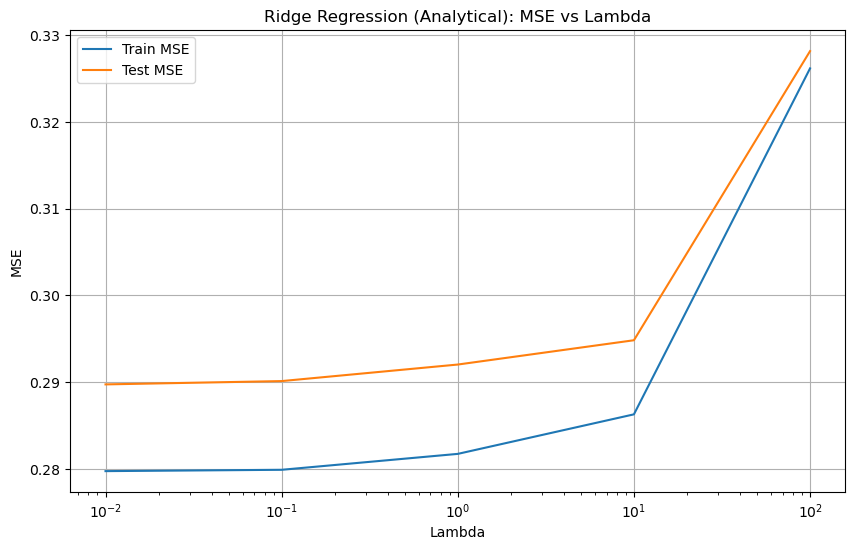

Best Ridge Lambda (Analytical): 0.01
Best Ridge MSE (Test Set): 0.289736


In [18]:
# 实现岭回归的解析解
def ridge_regression(X, Y, lambda_):
    n_features = X.shape[1]
    I = np.eye(n_features)
    A = X.T.dot(X) + lambda_ * I
    b = X.T.dot(Y)

    W_ridge = np.linalg.solve(A, b)
    return W_ridge

# 定义不同的正则化参数
lambdas = [0.01, 0.1, 1, 10, 100]
ridge_train_losses, ridge_test_losses = [], []

# 计算不同正则化参数下的训练和测试误差
for lambda_ in lambdas:
    W_ridge = ridge_regression(X_train, Y_train, lambda_)
    ridge_train_losses.append(MSE(X_train, Y_train, W_ridge))
    ridge_test_losses.append(MSE(X_test, Y_test, W_ridge))

# 绘制训练和测试误差曲线
plt.figure(figsize=(10, 6))
plt.plot(lambdas, ridge_train_losses, label='Train MSE')
plt.plot(lambdas, ridge_test_losses, label='Test MSE')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Ridge Regression (Analytical): MSE vs Lambda')
plt.legend()
plt.grid(True)
plt.show()

# 寻找最佳的正则化参数
best_ridge_lambda = lambdas[np.argmin(ridge_test_losses)]
print(f"Best Ridge Lambda (Analytical): {best_ridge_lambda}")
print(f"Best Ridge MSE (Test Set): {min(ridge_test_losses):.6f}")


 最佳正则化系数为 0.01，其对应的测试集 MSE 最小。

### 比较三种方法的性能

比较BGD、SGD和岭回归的最佳性能，从而分析各方法的优缺点

In [19]:
# 比较三种方法的性能
print(f"BGD Best MSE: {best_bgd_mse:.6f}")
print(f"SGD Best MSE: {best_sgd_mse:.6f}")
print(f"Ridge Best MSE: {min(ridge_test_losses):.6f}")

BGD Best MSE: 0.302672
SGD Best MSE: 0.291949
Ridge Best MSE: 0.289736


根据结果，我们可以看出:
1. 岭回归在这个数据集上表现最好，可能是因为它能够有效处理特征之间的相关性。
2. BGD和SGD的性能相近，但SGD收敛速度更快。
3. 所有方法都能有效降低MSE，说明线性回归模型适合这个数据集。